In [1]:
# Imports

import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, auc, roc_curve, precision_recall_curve, average_precision_score

In [2]:
# Part 1: Preprocessing the Data

In [3]:
# Reading data from a .csv file to pandas DataFrame
file = "./dataset/CCES22_Common_OUTPUT_vv_topost.csv"
originalData = pd.read_csv(file, low_memory = False)
originalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 707 entries, Unnamed: 0 to sourcevar
dtypes: float64(449), int64(89), object(169)
memory usage: 323.6+ MB


In [4]:
# Creating another DataFrame to protect the original data
preprocessedData = originalData

# Dropping rows pertaining to people not registered to vote
preprocessedData = preprocessedData.dropna(subset=['TS_voterstatus'])
preprocessedData = preprocessedData.dropna(subset=['TS_partyreg'])

# info() check after first preprocessing step
preprocessedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18534 entries, 2 to 59999
Columns: 707 entries, Unnamed: 0 to sourcevar
dtypes: float64(449), int64(89), object(169)
memory usage: 100.1+ MB


In [5]:
# Dropping all unnecessary features
    # Ones not regarding subjects' demographic/ideological info (they have no effect on subjects' political parties)

firstBatch = ["TS_voterstatus", "TS_g2022", "TS_p2022", "TS_p2022_party", "tookpost", "CCEStake",
                "add_confirm", "comptype", "votereg_f", "ccesmodule", "CC22_360", "presvote20post",
                "CC22_365_voted", "CC22_365b_voted", "CC22_366_voted", "CC22_367_voted", "CC22_365",
                "CC22_365b", "CC22_365c", "CC22_366", "CC22_367", "CC22_367a", "religpew_protestant",
                "religpew_baptist", "religpew_methodist", "religpew_nondenom", "religpew_lutheran",
                "religpew_presby", "religpew_pentecost", "religpew_episcop", "religpew_christian",
                "religpew_congreg", "religpew_holiness", "religpew_reformed", "religpew_advent",
                "religpew_catholic", "religpew_mormon", "religpew_orthodox", "religpew_jewish",
                "religpew_muslim", "religpew_buddhist", "religpew_hindu", "union_coverage", "healthins2",
                "presvote16post", "regzip_confirm_post", "reszip_confirm_post", "votereg_post",
                "votereg_f_post", "inputstate_post", "gender4_post", "CC22_401", "CC22_402a", "CC22_402b",
                "CC22_403", "CC22_403b", "CC22_403c", "CC22_403d", "CC22_404", "CC22_405", "CC22_406a",
                "CC22_406b_1","CC22_406b_2","CC22_406b_3","CC22_406b_4","CC22_406b_t", "CC22_406c",
                "CC22_411", "CC22_411b", "CC22_412", "CC22_413", "CC22_411_nv", "CC22_411b_nv", "CC22_412_nv",
                "CC22_413_nv", "CC22_414a", "CC22_414b", "CC22_415c", "CC22_415d", "CC22_416a", "CC22_416b",
                "CC22_416c", "CC22_416a_other", "CC22_416b_other", "CC22_416c_other", "CC22_432a",
                "CC22_433_dem", "CC22_433_rep", "HouseCand3Name_post", "HouseCand3Party_post",
                "HouseCand4Name_post", "HouseCand4Party_post", "HouseCand5Name_post", "HouseCand5Party_post",
                "HouseCand6Name_post", "HouseCand6Party_post", "HouseCand7Name_post", "HouseCand7Party_post",
                "HouseCand8Name_post", "HouseCand8Party_post", "SenCand1Name_post", "SenCand1Party_post",
                "SenCand2Name_post", "SenCand2Party_post", "SenCand3Name_post", "SenCand3Party_post",
                "SenCand4Name_post", "SenCand4Party_post", "SenCand1Name2_post", "SenCand1Party2_post",
                "SenCand2Name2_post", "SenCand2Party2_post", "AttCand1Name", "AttCand2Name", "AttCand3Name",
                "AttCand1Party", "AttCand2Party", "AttCand3Party", "SecCand1Name", "SecCand2Name",
                "SecCand3Name", "SecCand1Party", "SecCand2Party", "SecCand3Party", "starttime", "endtime",
                "starttime_post", "endtime_post", "HouseCand2Name", "HouseCand2Party", "HouseCand3Name",
                "HouseCand3Party", "HouseCand4Name", "HouseCand4Party", "HouseCand5Name", "HouseCand5Party",
                "HouseCand6Name", "HouseCand6Party", "HouseCand7Name", "HouseCand7Party", "HouseCand8Name",
                "HouseCand8Party", "SenCand1Name", "SenCand1Party", "SenCand2Name", "SenCand2Party",
                "SenCand3Name", "SenCand3Party", "SenCand4Name", "SenCand4Party", "SenCand1Name2",
                "SenCand1Party2", "SenCand2Name2", "SenCand2Party2", "countyname", "LowerChamberName_post",
                "HouseCand2Party_post", "CurrentGovParty_post", "CurrentHouseName_post",
                "CurrentHouseParty_post", "CurrentSen1Name_post", "CurrentSen1Party_post",
                "CurrentSen2Name_post", "CurrentSen2Party_post", "GovCand1Name_post", "GovCand1Party_post",
                "GovCand2Name_post", "GovCand2Party_post", "GovCand3Name_post", "GovCand3Party_post",
                "HouseCand1Name_post", "HouseCand1Party_post", "HouseCand2Name_post", "HouseCand2Party_post",
                "presvote16post_t", "LegName", "HouseCand1Party", "UpperChamberName", "CurrentGovName",
                "CurrentGovParty", "CurrentHouseName", "CurrentHouseParty", "CurrentSen1Name",
                "CurrentSen1Party", "CurrentSen2Name",    "CurrentSen2Party", "GovCand1Name", "GovCand1Party",
                "GovCand2Name", "GovCand2Party", "GovCand3Name", "GovCand3Party", "HouseCand1Name",
                "HouseCand1Party", "presvote20post_t", "LowerChamberName", "LegName_post",
                "CurrentGovName_post", "CC22_365_voted_t", "CC22_365b_voted_t", "CC22_366_voted_t",
                "CC22_367_voted_t", "CC22_365_t", "CC22_365a_t", "CC22_365b_t", "CC22_365c_t",
                "CC22_366_t", "CC22_367_t", "CC22_367a_t", "CC22_402a_t", "CC22_402b_t", "CC22_403c_t",
                "CC22_403d_t", "CC22_404_t", "CC22_411_t", "CC22_411b_t", "CC22_412_t", "CC22_413_t",
                "CC22_411_nv_t", "CC22_411b_nv_t", "CC22_412_nv_t", "CC22_413_nv_t", "sourcevar", "race_other",
                "lookupzip_post"]
secondBatch = [col for col in preprocessedData.columns if col.endswith('_timing')]
thirdBatch = [col for col in preprocessedData.columns if col.endswith('_t')]

unnecessaryColumns = firstBatch + secondBatch + thirdBatch

preprocessedData = preprocessedData.drop(unnecessaryColumns, axis=1)

# info() check after second preprocessing step
preprocessedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18534 entries, 2 to 59999
Columns: 328 entries, Unnamed: 0 to TS_partyreg
dtypes: float64(245), int64(83)
memory usage: 46.5 MB


In [6]:
# Checking if there are any categorical variables to encode
categorical = preprocessedData.select_dtypes(include=['object', 'category']).columns.tolist()
print(preprocessedData.dtypes[categorical])

Series([], dtype: object)


In [7]:
# Replacing any and all empty values with the means of their respective columns
    # Choosing to use the means because this average number will not sway the models either which way
        # mean = neutral characteristic that has no bearing on the subjects' political parties

intCols = preprocessedData.select_dtypes(include='int64').columns
floatCols = preprocessedData.select_dtypes(include='float64').columns

# Rounding the mean() for int64 columns to keep the datatype the same
preprocessedData[intCols] = preprocessedData[intCols].fillna(preprocessedData[intCols].mean().round())
preprocessedData[floatCols] = preprocessedData[floatCols].fillna(preprocessedData[floatCols].mean())

# Taking care of target type discrepancy
preprocessedData['TS_partyreg'] = preprocessedData['TS_partyreg'].astype(int)

# info() check after third preprocessing step
preprocessedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18534 entries, 2 to 59999
Columns: 328 entries, Unnamed: 0 to TS_partyreg
dtypes: float64(244), int64(84)
memory usage: 46.5 MB


In [8]:
# Saving preprocessed data into an external file just in case of any mishaps
preprocessedData.to_csv("./dataset/preprocessedData.csv", index = False)

In [9]:
# Splitting the preprocessed data into training and testing sets
features = preprocessedData.drop(columns=['TS_partyreg'])
target = preprocessedData['TS_partyreg']

featureTrain, featureTest, targetTrain, targetTest = train_test_split(features, target, test_size = 0.3, random_state = 42)

# Scaling features for the Logistic Regression, Support Vector Machine & Neural Network Models
scaler = StandardScaler()
scaledFeatureTrain = scaler.fit_transform(featureTrain)
scaledFeatureTest = scaler.fit_transform(featureTest)

In [10]:
# Preprocessing the data complete!

In [11]:
# Part 2: Training the Models

In [12]:
# First model is DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', max_depth = None, random_state = 42)
DT.fit(featureTrain, targetTrain)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [13]:
# Second model is Random Forest
RF = RandomForestClassifier(n_estimators = 100)  
RF.fit(featureTrain, targetTrain)

RandomForestClassifier()

In [14]:
# Third model is Support Vector Machine
SVM = svm.SVC(kernel = "rbf", C = 10, gamma = 0.0001) # C and gamma values found through GridSearchCV(), which is not shown for simplicity's sake
SVM.fit(featureTrain, targetTrain)

SVC(C=10, gamma=0.0001)

In [15]:
# Fourth model is K-Nearest Neighbours
KNN = KNeighborsClassifier(n_neighbors = 7) 
KNN.fit(featureTrain, targetTrain)

KNeighborsClassifier(n_neighbors=7)

In [16]:
# Fifth model is Logistic Regression
LR = LogisticRegression(max_iter = 200) # found a max_iter that achieves convergence
LR.fit(scaledFeatureTrain, targetTrain)

LogisticRegression(max_iter=200)

In [17]:
# Sixth model is Naive Bayes (Multinomial)
MNB = MultinomialNB()
MNB.fit(featureTrain, targetTrain)

MultinomialNB()

In [18]:
# Seventh model is XGBoost
XGB = XGBClassifier(eval_metric='mlogloss')
XGB.fit(featureTrain, targetTrain-1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
# Eighth model is Neural Network
numFeatures = len(preprocessedData.axes[1]) - 1

mlp = MLPClassifier(hidden_layer_sizes=(int(numFeatures),int(numFeatures/2), int(numFeatures/4), int(numFeatures/8)), activation='relu', solver='adam', max_iter=200, random_state=42)
mlp.fit(scaledFeatureTrain, targetTrain)

MLPClassifier(hidden_layer_sizes=(327, 163, 81, 40), random_state=42)

In [20]:
# Model creation and training complete!

In [21]:
# Part 3: Evaluating Models' Performances

In [22]:
# First model - DecisionTreeClassifier
predictionsDT = DT.predict(featureTest)

# Evaluate the model
accuracyDT = accuracy_score(targetTest, predictionsDT)
precisionDT = precision_score(targetTest, predictionsDT, average='weighted', zero_division=0)
recallDT = recall_score(targetTest, predictionsDT, average='weighted')
f1DT = f1_score(targetTest, predictionsDT, average='weighted')
confusionMatrixDT = confusion_matrix(targetTest, predictionsDT)

# Print the evaluation metrics
print(f'Accuracy: {accuracyDT:.4f}')
print(f'Precision: {precisionDT:.4f}')
print(f'Recall: {recallDT:.4f}')
print(f'F1 Score: {f1DT:.4f}')
print('Confusion Matrix:')
print(confusionMatrixDT)

Accuracy: 0.8293
Precision: 0.8313
Recall: 0.8293
F1 Score: 0.8303
Confusion Matrix:
[[   0    2    0    0    0    0    0    4    0]
 [   0 2837   16   56    9   34    0  219    3]
 [   0   18    0    0    0    4    0    4    0]
 [   1   57    1   28    5    4    0   58    0]
 [   0   12    0    3    6    1    0   23    0]
 [   0   25    1    5    2   16    0   26    1]
 [   0    1    0    0    0    0    1    1    0]
 [   4  219    9   58   25   32    1 1724    2]
 [   0    2    0    0    0    0    0    1    0]]


In [23]:
# Second model - Random Forest
predictionsRF = RF.predict(featureTest)
probabilityRF = RF.predict_proba(featureTest)

# Evaluate the model
accuracyRF = accuracy_score(targetTest, predictionsRF)
precisionRF = precision_score(targetTest, predictionsRF, average='weighted', zero_division=0)
recallRF = recall_score(targetTest, predictionsRF, average='weighted')
f1RF = f1_score(targetTest, predictionsRF, average='weighted')
confusionMatrixRF = confusion_matrix(targetTest, predictionsRF)

# Print the evaluation metrics
print(f'Accuracy: {accuracyRF:.4f}')
print(f'Precision: {precisionRF:.4f}')
print(f'Recall: {recallRF:.4f}')
print(f'F1 Score: {f1RF:.4f}')
print('Confusion Matrix:')
print(confusionMatrixRF)

Accuracy: 0.8937
Precision: 0.8515
Recall: 0.8937
F1 Score: 0.8681
Confusion Matrix:
[[   0    2    0    0    0    0    0    4    0]
 [   0 3044    0    0    0    0    0  130    0]
 [   0   24    0    0    0    0    0    2    0]
 [   0   83    0    0    0    0    0   71    0]
 [   0   18    0    0    1    0    0   26    0]
 [   0   41    0    0    0    0    0   35    0]
 [   0    3    0    0    0    0    0    0    0]
 [   0  149    0    0    0    0    0 1925    0]
 [   0    3    0    0    0    0    0    0    0]]


In [24]:
# Third model - Support Vector Machine
predictionsSVM = SVM.predict(featureTest)

# Evaluate the model
accuracySVM = accuracy_score(targetTest, predictionsSVM)
precisionSVM = precision_score(targetTest, predictionsSVM, average='weighted', zero_division=0)
recallSVM = recall_score(targetTest, predictionsSVM, average='weighted')
f1SVM = f1_score(targetTest, predictionsSVM, average='weighted')
confusionMatrixSVM = confusion_matrix(targetTest, predictionsSVM)

# Print the evaluation metrics
print(f'Accuracy: {accuracySVM:.4f}')
print(f'Precision: {precisionSVM:.4f}')
print(f'Recall: {recallSVM:.4f}')
print(f'F1 Score: {f1SVM:.4f}')
print('Confusion Matrix:')
print(confusionMatrixSVM)

Accuracy: 0.5708
Precision: 0.3258
Recall: 0.5708
F1 Score: 0.4148
Confusion Matrix:
[[   0    6    0    0    0    0    0    0    0]
 [   0 3174    0    0    0    0    0    0    0]
 [   0   26    0    0    0    0    0    0    0]
 [   0  154    0    0    0    0    0    0    0]
 [   0   45    0    0    0    0    0    0    0]
 [   0   76    0    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0    0]
 [   0 2074    0    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0    0]]


In [25]:
# Fourth model - K-Nearest Neighbours
predictionsKNN = KNN.predict(featureTest)

# Evaluate the model
accuracyKNN = accuracy_score(targetTest, predictionsKNN)
precisionKNN = precision_score(targetTest, predictionsKNN, average='weighted', zero_division=0)
recallKNN = recall_score(targetTest, predictionsKNN, average='weighted')
f1KNN = f1_score(targetTest, predictionsKNN, average='weighted')
confusionMatrixKNN = confusion_matrix(targetTest, predictionsKNN)

# Print the evaluation metrics
print(f'Accuracy: {accuracyKNN:.4f}')
print(f'Precision: {precisionKNN:.4f}')
print(f'Recall: {recallKNN:.4f}')
print(f'F1 Score: {f1KNN:.4f}')
print('Confusion Matrix:')
print(confusionMatrixKNN)

Accuracy: 0.5235
Precision: 0.4731
Recall: 0.5235
F1 Score: 0.4902
Confusion Matrix:
[[   0    4    0    0    0    0    0    2    0]
 [   0 2316    0    0    1    0    0  857    0]
 [   0   20    0    0    0    0    0    6    0]
 [   0  112    0    0    0    0    0   42    0]
 [   0   33    0    0    0    0    0   12    0]
 [   0   58    0    0    0    0    0   18    0]
 [   0    3    0    0    0    0    0    0    0]
 [   0 1478    0    1    0    0    0  595    0]
 [   0    3    0    0    0    0    0    0    0]]


In [26]:
# Fifth model - Logistic Regression
predictionsLR = LR.predict(scaledFeatureTest)

# Evaluate the model
accuracyLR = accuracy_score(targetTest, predictionsLR)
precisionLR = precision_score(targetTest, predictionsLR, average='weighted', zero_division=0)
recallLR = recall_score(targetTest, predictionsLR, average='weighted')
f1LR = f1_score(targetTest, predictionsLR, average='weighted')
confusionMatrixLR = confusion_matrix(targetTest, predictionsLR)

# Print the evaluation metrics
print(f'Accuracy: {accuracyLR:.4f}')
print(f'Precision: {precisionLR:.4f}')
print(f'Recall: {recallLR:.4f}')
print(f'F1 Score: {f1LR:.4f}')
print('Confusion Matrix:')
print(confusionMatrixLR)

Accuracy: 0.8757
Precision: 0.8612
Recall: 0.8757
F1 Score: 0.8674
Confusion Matrix:
[[   0    1    0    1    0    0    0    4    0]
 [   2 2983   13   28   20   10    0  118    0]
 [   0   21    2    1    0    0    0    2    0]
 [   0   66    3   18    2    2    0   63    0]
 [   0   14    3    4    5    0    0   19    0]
 [   0   37    1    1    4    5    0   28    0]
 [   0    3    0    0    0    0    0    0    0]
 [   0  146    9   18   25   19    0 1857    0]
 [   0    3    0    0    0    0    0    0    0]]


In [27]:
# Sixth model - Naive Bayes (Multinomial)
predictionsMNB = MNB.predict(featureTest)

# Evaluate the model
accuracyMNB = accuracy_score(targetTest, predictionsMNB)
precisionMNB = precision_score(targetTest, predictionsMNB, average='weighted', zero_division=0)
recallMNB = recall_score(targetTest, predictionsMNB, average='weighted')
f1MNB = f1_score(targetTest, predictionsMNB, average='weighted')
confusionMatrixMNB = confusion_matrix(targetTest, predictionsMNB)

# Print the evaluation metrics
print(f'Accuracy: {accuracyMNB:.4f}')
print(f'Precision: {precisionMNB:.4f}')
print(f'Recall: {recallMNB:.4f}')
print(f'F1 Score: {f1MNB:.4f}')
print('Confusion Matrix:')
print(confusionMatrixMNB)

Accuracy: 0.0277
Precision: 0.4824
Recall: 0.0277
F1 Score: 0.0382
Confusion Matrix:
[[  2   0   0   0   0   0   0   0   4]
 [804  43 480  68 201 501 389  63 625]
 [  8   0   2   0   1   6   8   0   1]
 [ 31   5  23  24  23  24  11   3  10]
 [ 10   0   5   0   1   8  14   1   6]
 [  5   2   5   2   4  23  28   3   4]
 [  0   0   0   0   0   1   2   0   0]
 [379  28 389 109 164 337 193  55 420]
 [  1   0   0   0   0   0   0   0   2]]


In [28]:
# Seventh model - XGBoost
predictionsXGB = XGB.predict(featureTest)

# Evaluate the model
accuracyXGB = accuracy_score(targetTest, predictionsXGB)
precisionXGB = precision_score(targetTest, predictionsXGB, average='weighted', zero_division=0)
recallXGB = recall_score(targetTest, predictionsXGB, average='weighted')
f1XGB = f1_score(targetTest, predictionsXGB, average='weighted')
confusionMatrixXGB = confusion_matrix(targetTest, predictionsXGB)

# Print the evaluation metrics
print(f'Accuracy: {accuracyXGB:.4f}')
print(f'Precision: {precisionXGB:.4f}')
print(f'Recall: {recallXGB:.4f}')
print(f'F1 Score: {f1XGB:.4f}')
print('Confusion Matrix:')
print(confusionMatrixXGB)

Accuracy: 0.0002
Precision: 0.0000
Recall: 0.0002
F1 Score: 0.0000
Confusion Matrix:
[[   1    0    1    0    0    0    4    0    0]
 [3035    0   14    2    4    0  119    0    0]
 [  25    0    0    0    0    0    1    0    0]
 [  66    0   25    0    0    0   63    0    0]
 [  16    0    1    3    0    0   25    0    0]
 [  38    0    2    0    4    0   32    0    0]
 [   3    0    0    0    0    0    0    0    0]
 [ 152    1   17    4    2    0 1898    0    0]
 [   3    0    0    0    0    0    0    0    0]]


In [29]:
# Eighth model - Neural Network
predictionsMLP = mlp.predict(scaledFeatureTest)

# Evaluate the model
accuracyMLP = accuracy_score(targetTest, predictionsMLP)
precisionMLP = precision_score(targetTest, predictionsMLP, average='weighted', zero_division=0)
recallMLP = recall_score(targetTest, predictionsMLP, average='weighted')
f1MLP = f1_score(targetTest, predictionsMLP, average='weighted')
confusionMatrixMLP = confusion_matrix(targetTest, predictionsMLP)

# Print the evaluation metrics
print(f'Accuracy: {accuracyMLP:.4f}')
print(f'Precision: {precisionMLP:.4f}')
print(f'Recall: {recallMLP:.4f}')
print(f'F1 Score: {f1MLP:.4f}')
print('Confusion Matrix:')
print(confusionMatrixMLP)

Accuracy: 0.8720
Precision: 0.8537
Recall: 0.8720
F1 Score: 0.8621
Confusion Matrix:
[[   0    1    0    0    0    0    0    5    0]
 [   0 2979    4   31    4   14    0  142    0]
 [   0   22    1    1    0    0    0    2    0]
 [   0   59    0   22    2    4    0   67    0]
 [   1   12    0    7    5    1    0   19    0]
 [   0   33    0    6    1    3    0   33    0]
 [   0    3    0    0    0    0    0    0    0]
 [   0  164    1   36   20   13    0 1839    1]
 [   0    3    0    0    0    0    0    0    0]]


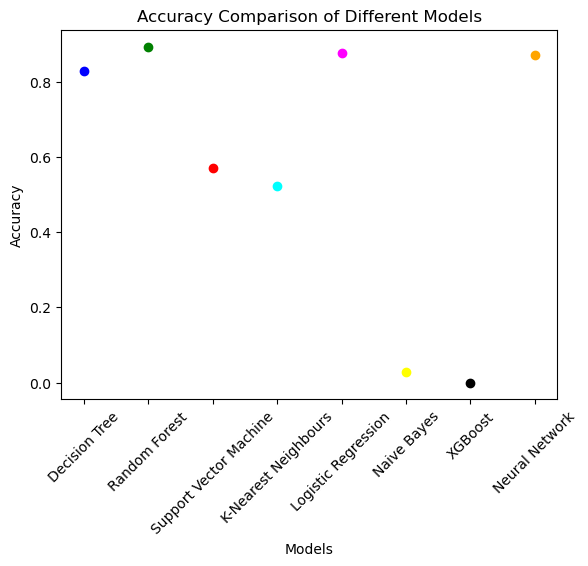

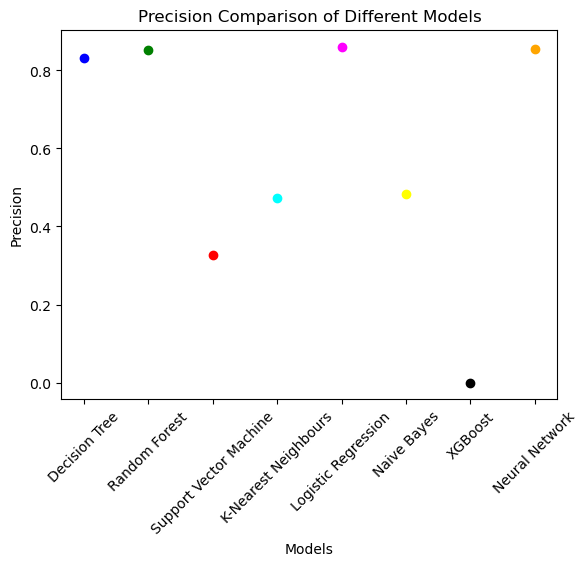

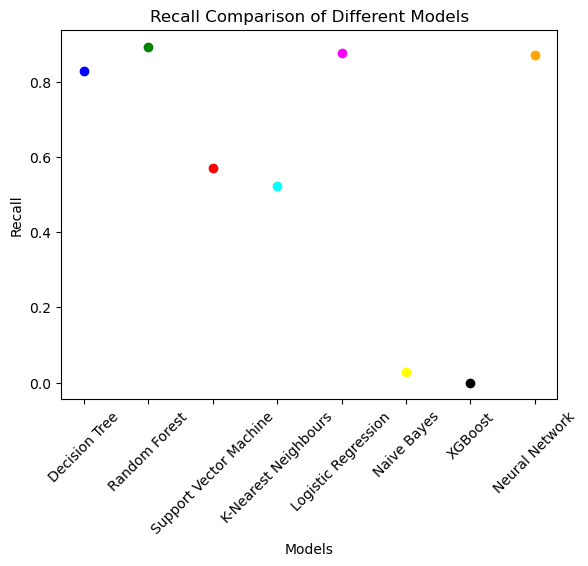

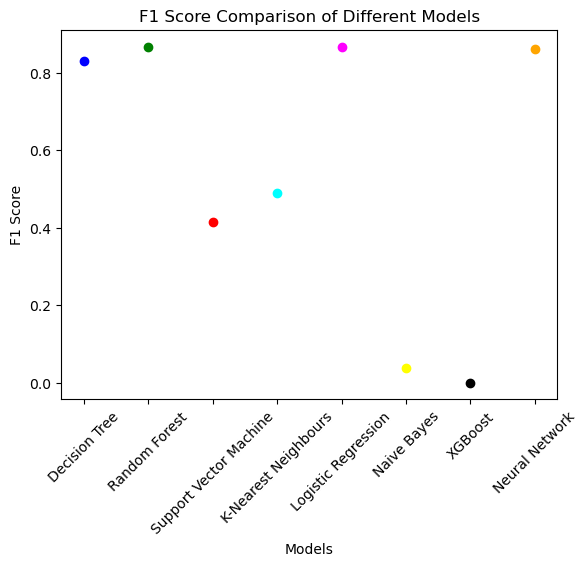

In [30]:
# Plotting each evaluation metric against one another

models = ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbours', 'Logistic Regression', 'Naive Bayes', 'XGBoost', 'Neural Network']
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

accuracy = [accuracyDT, accuracyRF, accuracySVM, accuracyKNN, accuracyLR, accuracyMNB, accuracyXGB, accuracyMLP]
precision = [precisionDT, precisionRF, precisionSVM, precisionKNN, precisionLR, precisionMNB, precisionXGB, precisionMLP]
recall = [recallDT, recallRF, recallSVM, recallKNN, recallLR, recallMNB, recallXGB, recallMLP]
f1 = [f1DT, f1RF, f1SVM, f1KNN, f1LR, f1MNB, f1XGB, f1MLP]

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

for metric, values in metrics.items():
    plt.figure()
    for i, value in enumerate(values):
        plt.scatter(models[i], value, color=colors[i], label=models[i])
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison of Different Models')
    plt.xticks(rotation=45)
    plt.show()

In [31]:
# Model Evaluation complete! The most sucessful model is Random Forest!

In [32]:
# BONUS: Further Random Forest Performance Evaluation

ROC-AUC: 0.9652779809499004


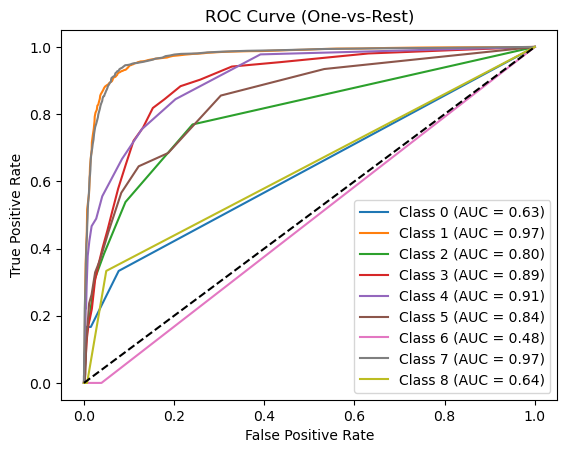

In [33]:
# ROC Score
roc_auc = roc_auc_score(targetTest, probabilityRF, multi_class='ovr', average='weighted')
print(f"ROC-AUC: {roc_auc}")

# ROC Curve
y_test_binarized = label_binarize(targetTest, classes=np.unique(targetTest))
n_classes = y_test_binarized.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], probabilityRF[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()

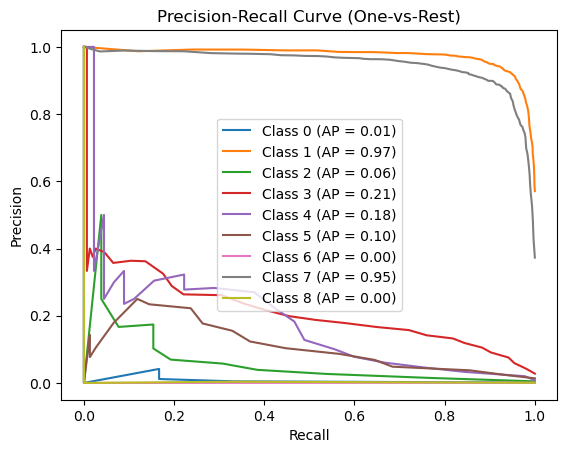

In [34]:
# Precision-Recall Curve

y_test_binarized = label_binarize(targetTest, classes=np.unique(targetTest))
n_classes = y_test_binarized.shape[1]

precision = {}
recall = {}
average_precision = {}

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], probabilityRF[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], probabilityRF[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f"Class {i} (AP = {average_precision[i]:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (One-vs-Rest)")
plt.legend()
plt.show()


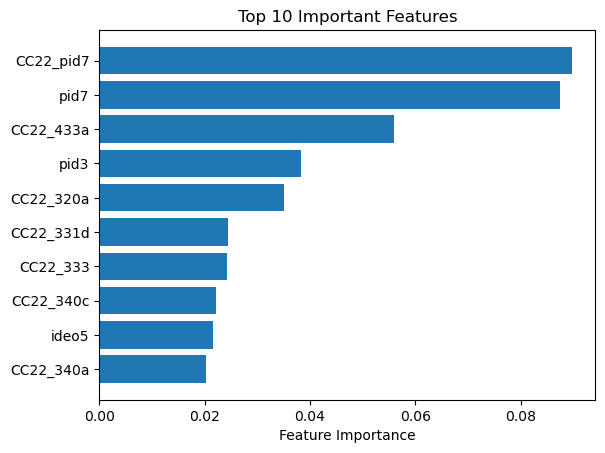

In [35]:
# Feature Importance

feature_importances = RF.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1][:10]
plt.barh(features.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()